# Imports

In [19]:
import json
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import dataframes

## Heroes id

In [2]:
f = open('data/hero_id.json',)
data = json.load(f)['heroes']
heroes = pd.read_json(json.dumps(data))
heroes.drop(['name'],axis=1,inplace=True)
heroes.set_index('id',inplace=True)
hero_id_dict = dict(heroes['localized_name'].to_dict())
items = hero_id_dict.items()
names = sorted(items)
hero_id_dict = dict(names)

## Matches id

In [53]:
#get match info
matches = pd.read_csv('data/match.csv').drop(['leaguename','account_id'],axis=1)
match_ids = list(matches['match_id'].unique())

hero_ids = []
wins = []

for match_id in match_ids:
    hero_ids_match = list(matches[matches['match_id']==match_id]['hero_id'].values)
    hero_ids.append(hero_ids_match)
    win = int(matches[matches['match_id']==match_id]['win'].values[-1])
    wins.append(win)

hero_ids = np.array(hero_ids).reshape((len(hero_ids),10))

matches = pd.DataFrame(columns= 'rad_1 rad_2 rad_3 rad_4 rad_5 dire_1 dire_2 dire_3 dire_4 dire_5 win'.split())
matches['win'] = wins
matches[matches.columns[:10]] = hero_ids

# def id2name(hero_id):
#     try:
#         return hero_id_dict[hero_id]
         
#     except:
#         return None

# for i in range(10):
#     matches[matches.columns[i]] = matches[matches.columns[i]].apply(lambda x: id2name(x))
    

matches

,rad_1,rad_2,rad_3,rad_4,rad_5,dire_1,dire_2,dire_3,dire_4,dire_5,win
0,4,61,52,102,110,126,79,38,1,9,0
1,57,9,106,18,38,112,91,81,52,100,0
2,44,97,104,25,85,126,10,92,129,53,0
3,4,18,57,121,22,91,6,107,10,28,1
4,85,61,51,70,110,5,13,19,109,33,0
...,...,...,...,...,...,...,...,...,...,...,...
4412,95,97,120,27,110,8,69,129,26,58,0
4413,39,86,129,63,100,58,114,11,110,20,0
4414,42,23,129,110,58,95,43,13,100,85,1
4415,5,114,126,110,16,100,25,96,9,91,0


# Analysing data

## Most picked heroes

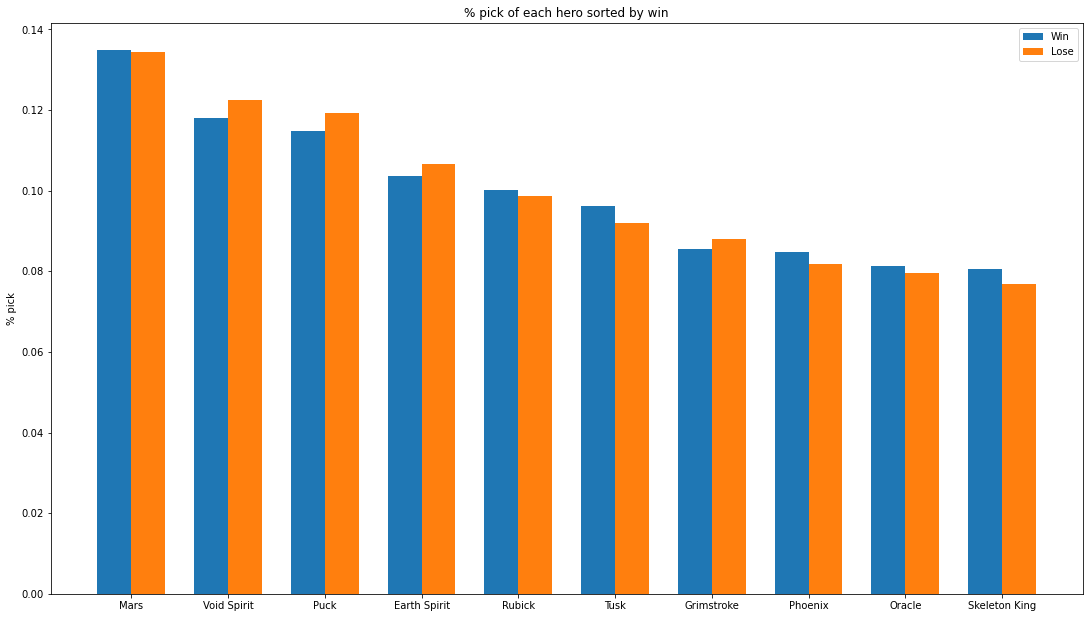

In [46]:
picks_win = matches[matches['win']==1].iloc[:,:10].values
unique_win, counts_win = np.unique(picks_win, return_counts=True)
picks_win_count = dict(zip(unique_win, counts_win))
picks_win_count = dict(sorted(picks_win_count.items(), key=lambda item: item[1], reverse=True))

top = 10

heroes_win = list(picks_win_count.keys())[:top]
count_win = np.array(list(picks_win_count.values())[:top])
count_win = count_win/count_win.sum()

picks_lose = matches[matches['win']==0].iloc[:,:10].values
unique_lose, counts_lose = np.unique(picks_lose, return_counts=True)
picks_lose_count = dict(zip(unique_lose, counts_lose))
picks_lose_count = dict(sorted(picks_lose_count.items(), key=lambda item: item[1], reverse=True))
heroes_lose = list(picks_lose_count.keys())[:top]
count_lose = np.array(list(picks_lose_count.values())[:top])
count_lose = count_lose/count_lose.sum()

labels = [hero_id_dict[hero] for hero in heroes_win]

x = np.arange(top)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
rects1 = ax.bar(x - width/2, count_win, width, label='Win')
rects2 = ax.bar(x + width/2, count_lose, width, label='Lose')

ax.set_ylabel('% pick')
ax.set_title('% pick of each hero sorted by win')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Top 10 win rates by hero

No handles with labels found to put in legend.


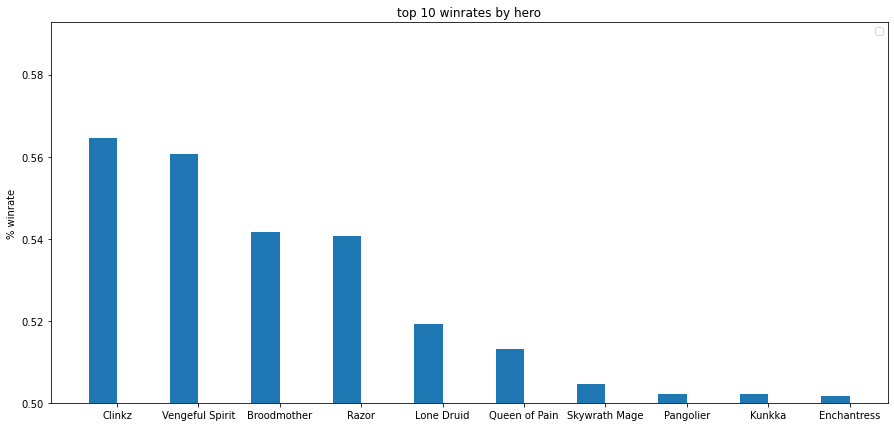

In [82]:
ids = list(hero_id_dict.keys())
winrates = []

for idx in ids:
    wins_hero = 0.0
    total_hero = 0.0
    for i in range(10):
        wins_hero += matches[matches[matches.columns[i]]==idx]['win'].sum()
        total_hero += len(matches[matches[matches.columns[i]]==idx]['win'])
    winrate = wins_hero/total_hero
    winrates.append(winrate)
    
winrate_dict = dict(zip(ids,winrates))
winrate_dict = dict(sorted(winrate_dict.items(), key=lambda item: item[1], reverse=True))
heroes_winrate = list(winrate_dict.keys())[:top]
winrates = np.array(list(winrate_dict.values())[:top])

labels = [hero_id_dict[hero] for hero in heroes_winrate]

x = np.arange(top)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
rects = ax.bar(x - width/2, winrates, width)

ax.set_ylabel('% winrate')
ax.set_title(f'top {top} winrates by hero')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(ymin=0.5)
ax.legend();

In [76]:
winrates

array([0.56451613, 0.56060606, 0.54166667, 0.54054054, 0.51923077,
       0.51319648, 0.5045045 , 0.50208044, 0.50205761, 0.50161812])